In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from src.nlp_preprocessing import get_sentiment_label

plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# reading the data 
df = pd.read_csv('../data/opinion_lexicon_scored_small_sample.csv')
df.shape

(9000, 17)

In [3]:
df.describe()

,overall,unixReviewTime,vote,sentiment_score
count,9000.000000,9.000000e+03,1713.000000,9000.000000
mean,3.000000,1.439360e+09,9.738471,0.081188
std,1.699768,6.302499e+07,26.193707,0.213692
min,1.000000,1.002586e+09,2.000000,-1.000000
25%,1.000000,1.410307e+09,2.000000,0.000000
50%,3.000000,1.449619e+09,3.000000,0.026667
75%,5.000000,1.483661e+09,7.000000,0.100000
max,5.000000,1.537834e+09,391.000000,1.000000


# What is the distribution of sentiment scores across the dataset?

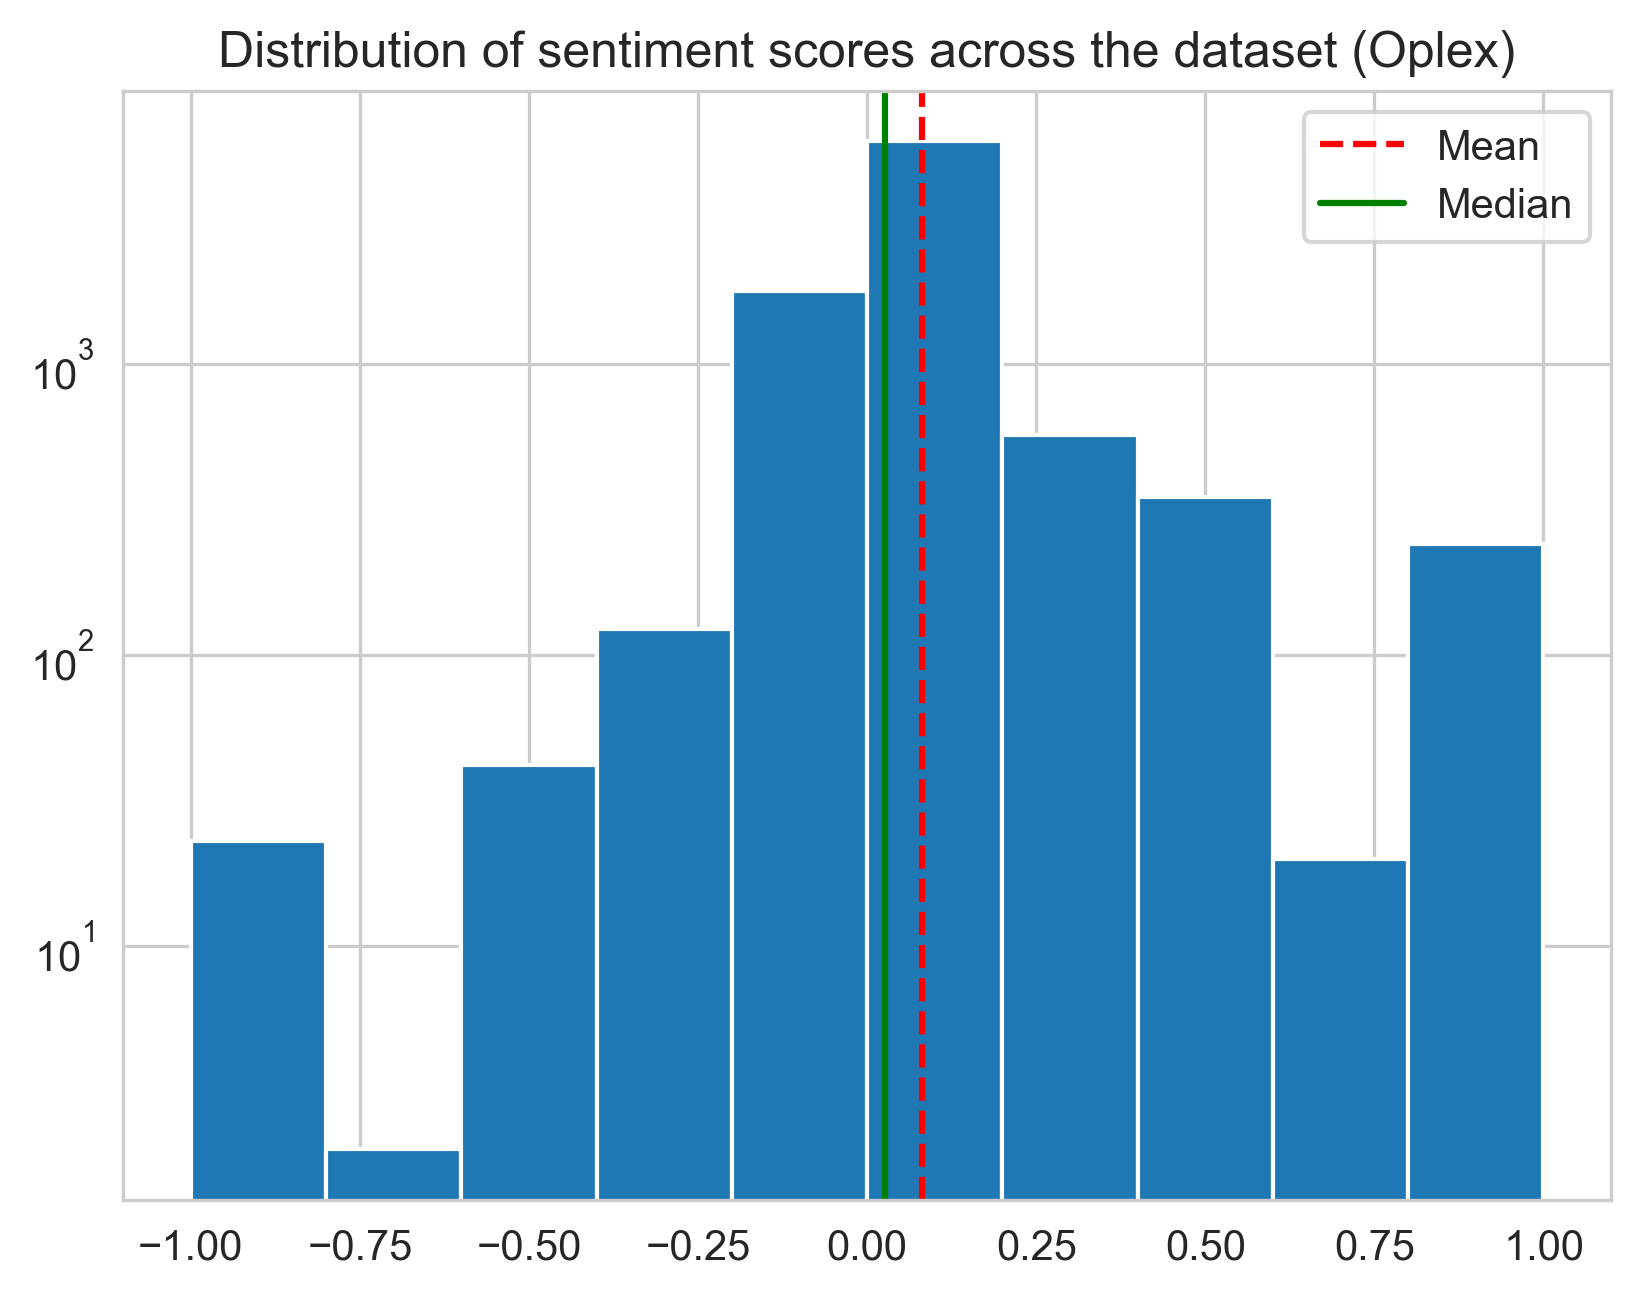

In [4]:
df['sentiment_score'].hist()
plt.axvline(df['sentiment_score'].mean(), color='red', linestyle='--')
plt.axvline(df['sentiment_score'].median(), color='green')
plt.legend({'Mean': df['sentiment_score'].mean(), 'Median':df['sentiment_score'].median()})
plt.title('Distribution of sentiment scores across the dataset (Oplex)')
plt.yscale('log')
plt.show()

# Correlation Test: Ratings vs Sentiment Scores

In [5]:
# calculating pearson correlation between overall and sentiment scores
corr_coef, p_value = pearsonr(df['overall'],
                              df['sentiment_score'])
print('Pearson correlation coefficient: ', corr_coef)
print('Pearson p-value', p_value)

# calculating spearman correlation between overall and sentiment scores
corr_coef_spearman, p_value_spearman = spearmanr(df['overall'],
                              df['sentiment_score'])
print('Pearson correlation coefficient: ', corr_coef_spearman)
print('Spearman p-value', p_value_spearman)

Pearson correlation coefficient:  0.4349775165212233
Pearson p-value 0.0
Pearson correlation coefficient:  0.5851047261876032
Spearman p-value 0.0


- Looking at the Pearson correlation, it shows weak positive correlation between the overall and sentiment scores, the pvalue is less than 0.5 hence it is statistically significant
- Spearman correlation suggests that there is a strong positive correlation between ratings and sentimental scores

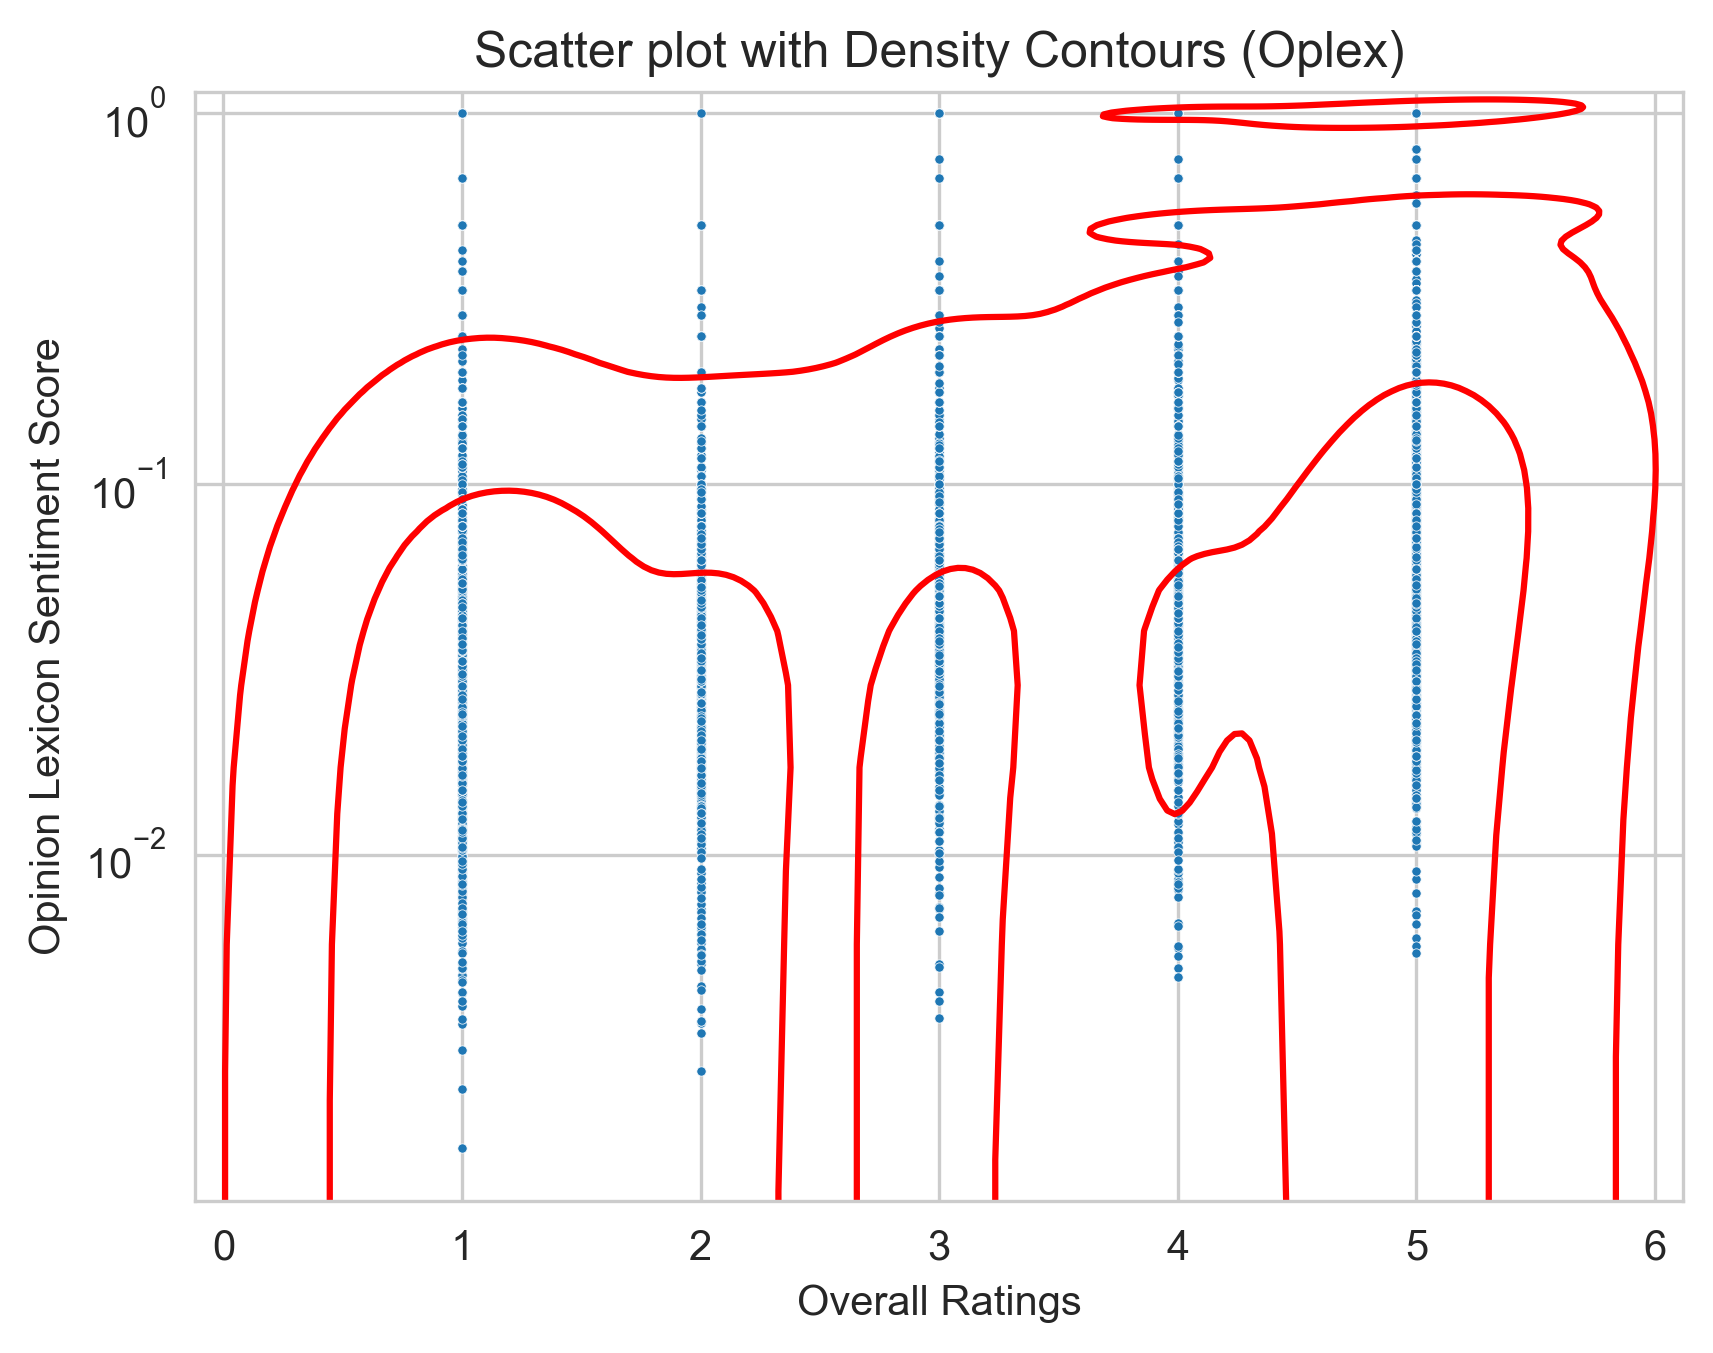

In [6]:
# plotting the scatter plot to visualise the correlation between the two
sns.scatterplot(data=df, x='overall', y='sentiment_score', s=5)
sns.kdeplot(data=df, x= 'overall', y='sentiment_score', levels=3, color='red')
plt.title('Scatter plot with Density Contours (Oplex)')
plt.xlabel('Overall Ratings')
plt.ylabel('Opinion Lexicon Sentiment Score')
plt.yscale('log')
plt.show()

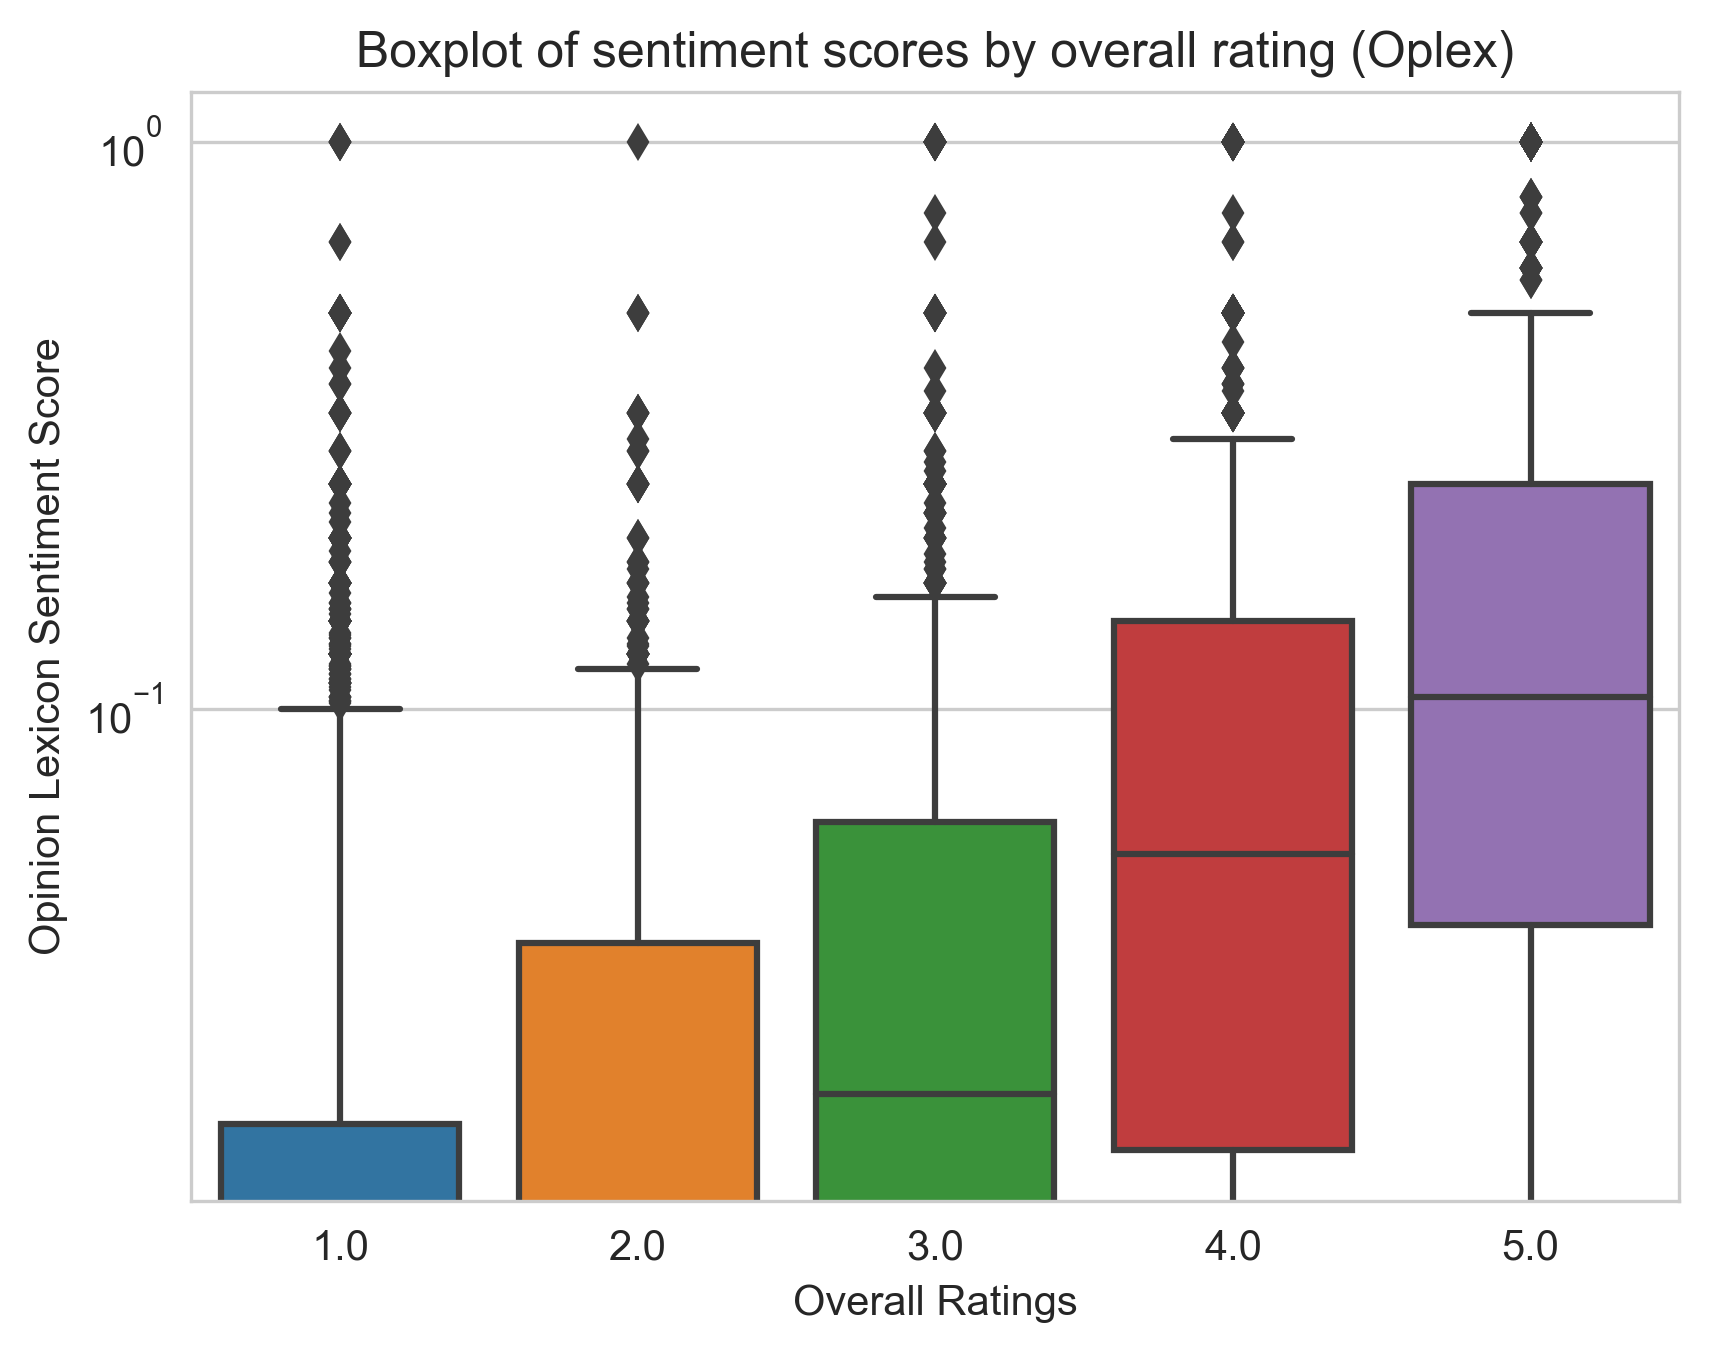

In [7]:
# plotting the boxplots for validating is the increase in the sentiment score as the overall ratings increase
sns.boxplot(data=df, x='overall',y='sentiment_score')
plt.title("Boxplot of sentiment scores by overall rating (Oplex)")
plt.xlabel('Overall Ratings')
plt.ylabel('Opinion Lexicon Sentiment Score')
plt.yscale('log')

There is a clear correlation between overall rating and sentiment score

In [8]:
# getting the sentiment labels for each row
# function source: nlp_preprocessing.py 
df['sentiment_labels'] = df['sentiment_score'].apply(get_sentiment_label)

In [9]:
df[['cleaned_review','sentiment_score','sentiment_labels']].sample(5)

,cleaned_review,sentiment_score,sentiment_labels
3336,k,0.000000,neutral
3114,trouble slipping cards in the sleeves and a little more work to fit it in the slot if you use those ive read someone slipped their id in one and got in,0.000000,neutral
8711,this is a sturdy cart and just what i needed the only trouble i had was inserting the casters but once i learned how it was easier called customer service and they guided me,0.029412,neutral
3804,i just purchased these pads again i had bought them before because unlike many of the pads sold at staples and other stores they dont bleed when you use a fountain pen to write on them with imagine my surprise to find out that the paper has become thinner and more porous and no longer allows me to write with a fountain pen i wont purchase this again,0.000000,neutral
6336,with all the projects that my 5 and 3 yearold like to do we can never have enough tape,0.105263,neutral
